In [2]:
import sympy as sp
import sympy.physics.vector as vec
sp.init_printing(use_latex=True)

In [13]:
x,y,z = sp.symbols("x y z")
phi = sp.Function("\phi")(x, y, z)
c = sp.Function("c")(x, y, z)
q1 = sp.Function("q1")(x, y, z)
q2 = sp.Function("q2")(x, y, z)
q3 = sp.Function("q3")(x, y, z)
q4 = sp.Function("q4")(x, y, z)
T = sp.Function("T")(x, y, z)
g = sp.Function("g")(phi)
m = sp.Function("m")(phi)
q1x = q1.diff(x)
q1y = q1.diff(y)
q1z = q1.diff(z)
q2x = q2.diff(x)
q2y = q2.diff(y)
q2z = q2.diff(z)
q3x = q3.diff(x)
q3y = q3.diff(y)
q3z = q3.diff(z)
q4x = q4.diff(x)
q4y = q4.diff(y)
q4z = q4.diff(z)
px = phi.diff(x)
py = phi.diff(y)
pz = phi.diff(z)
W_A,W_B,M_phi,M_q,H, R, T_mA, T_mB, L_A, L_B = sp.symbols('W_A W_B M_{\phi} M_q H R T_mA T_mB L_A L_B')
e_phi,e_q,e_sA, e_sB, C_A, C_B, v_m = sp.symbols('\epsilon_\phi \epsilon_q e_sA e_sB C_A C_B v_m')
eta,psix,psiy,psiz,y_e = sp.symbols('eta \psi_x \psi_y \psi_z \gamma_{\epsilon}')

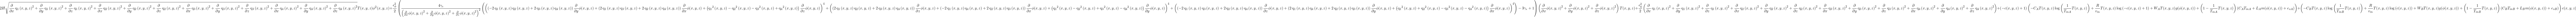

In [19]:
r = vec.ReferenceFrame('r')
psi = r.orientnew('\psi', "Quaternion", [q1, q2, q3, q4])
psix = psi.dcm(r)[0]*px + psi.dcm(r)[1]*py + psi.dcm(r)[2]*pz
psiy = psi.dcm(r)[3]*px + psi.dcm(r)[4]*py + psi.dcm(r)[5]*pz
psiz = psi.dcm(r)[6]*px + psi.dcm(r)[7]*py + psi.dcm(r)[8]*pz
eta = 1 - 3*y_e + 4*y_e*(psix**4 + psiy**4 + psiz**4)/(px**2+py**2+pz**2)**2
#eta
mgq = sp.sqrt(q1x**2+q1y**2+q1z**2+q2x**2+q2y**2+q2z**2+q3x**2+q3y**2+q3z**2+q4x**2+q4y**2+q4z**2)
fbulk = c*(W_B*g*T + (1-T/T_mB)*(e_sB+C_B*T_mB+m*L_B)-C_B*T*sp.log(T/T_mB) + R*T*sp.log(c)/v_m)+(1-c)*(W_A*g*T + (1-T/T_mA)*(e_sA+C_A*T_mA+m*L_A)-C_A*T*sp.log(T/T_mA) + R*T*sp.log(1-c)/v_m)
I = e_phi**2/2*eta*T*(px**2+py**2+pz**2) + 2*H*T*phi**2*mgq + e_q**2/2*mgq**2+fbulk
I


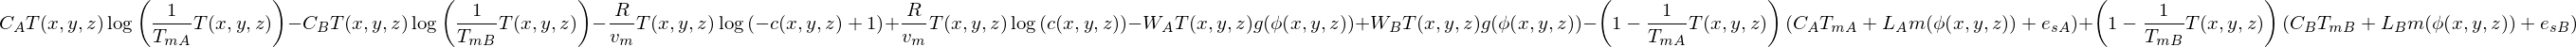

In [20]:
sp.diff(fbulk, c)